<a href="https://colab.research.google.com/github/helonayala/sysid/blob/main/case_studies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case studies

This notebook loads and plots data for the "Coupled Drives" case study.

In [ ]:
import os
import scipy.io
import numpy as np # Good practice to import, especially if .ravel() is needed
import matplotlib.pyplot as plt


In [ ]:

# Desired local filename

def process_and_plot_mat_file(file_url):

  local_filename = os.path.basename(file_url)

  # --- 1. Download the .mat file ---
  print(f"Downloading {file_url} as {local_filename}...")
  # Use -O to specify the output file, overwriting if it exists. -q for quiet.
  # Adding !rm -f to ensure a clean download if the cell is re-run.
  get_ipython().system(f"rm -f {local_filename}") # Remove if exists to ensure fresh download
  get_ipython().system(f"wget -q -O {local_filename} '{file_url}'")

  # Check if download was successful
  if not os.path.exists(local_filename):
      print(f"Error: File '{local_filename}' not found after attempting download. Please check the URL and wget command.")
  else:
      print(f"File '{local_filename}' downloaded successfully.")

      # --- 2. Load the .mat file and Extract Data ---
      try:
          print(f"Loading data from '{local_filename}'...")
          mat_data = scipy.io.loadmat(local_filename)
          print("File loaded. Extracting variables...")

          time_data = mat_data['time'].reshape(-1,1)
          u_data = mat_data['u'].reshape(-1,1)
          y_data = mat_data['y'].reshape(-1,1)
          # Check if 'yref' key exists and its content is not empty
          yref_data_raw = mat_data.get('yref')
          if yref_data_raw is not None and hasattr(yref_data_raw, 'size') and yref_data_raw.size > 0:
              yref_data = yref_data_raw.reshape(-1,1)
              flag_yref= 1
              print("Found 'yref' data.")
          else:
              yref_data = np.array([]) # Assign an empty numpy array if not found or empty
              flag_yref= 0
              print("No 'yref' data found or 'yref' was empty/None. Using empty array for yref_data.")

          # --- 3. Plotting ---
          # Using explicit figure and axes creation for more control
          fig, axs = plt.subplots(2, 1, sharex=True) # sharex makes sense for time series

          # Plot 1: Input u
          axs[0].plot(time_data, u_data, color='b') # Added color for clarity
          axs[0].set_title('Input Signal (u) vs. Time')
          axs[0].set_ylabel('u (Input)')
          axs[0].grid(True)

          # Plot 2: Output y and Reference yref
          axs[1].plot(time_data, y_data, 'k', label='y (Output)')
          if flag_yref == 1:
            axs[1].plot(time_data, yref_data, 'r', label='yref (Reference)')
          axs[1].set_title('Output (y) vs. Time')
          axs[1].set_xlabel('Time (s)')
          axs[1].set_ylabel('Value')
          axs[1].legend()
          axs[1].grid(True)

          plt.tight_layout() # Adjusts subplot params for a tight layout
          plt.show()

      except FileNotFoundError:
          # This case should be caught by the os.path.exists check earlier,
          # but good to have as a fallback for scipy.io.loadmat.
          print(f"Error: Could not find '{local_filename}' to load. Ensure download was successful.")
      except KeyError as e:
          # This handles cases where loadmat succeeds but specific keys are missing
          # (now partially handled by the explicit key check above, but good as a catch-all).
          print(f"KeyError: Variable {e} not found in the .mat file.")
          if 'mat_data' in locals(): # Check if mat_data was loaded
              print(f"Available keys in .mat file: {list(mat_data.keys())}")
      except Exception as e:
          print(f"An unexpected error occurred: {e}")
  return time_data, u_data, y_data, yref_data

File 'closedLoop.mat' downloaded successfully.
Loading data from 'closedLoop.mat'...
File loaded. Extracting variables...
Found 'yref' data.


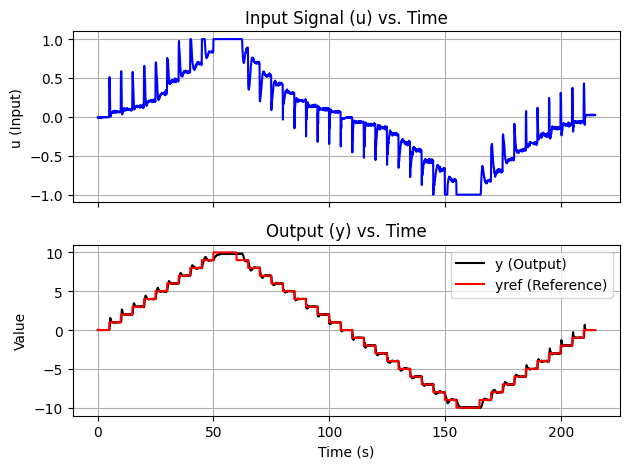

In [ ]:
# --- Configuration ---
# URL of the .mat file
file_url = 'https://github.com/helonayala/sysid/raw/refs/heads/main/data/closedLoop.mat'

time, u, y, yref = process_and_plot_mat_file(file_url)




File 'fixedStepSequence.mat' downloaded successfully.
Loading data from 'fixedStepSequence.mat'...
File loaded. Extracting variables...
No 'yref' data found or 'yref' was empty/None. Using empty array for yref_data.


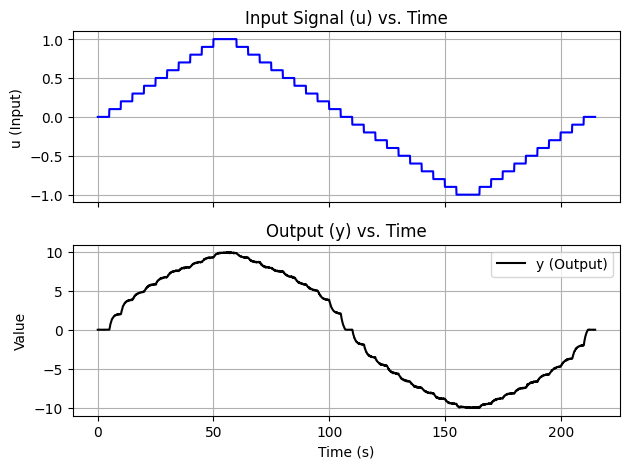

In [ ]:
# --- Configuration ---
# URL of the .mat file
file_url = 'https://github.com/helonayala/sysid/raw/refs/heads/main/data/fixedStepSequence.mat'

time, u, y, _ = process_and_plot_mat_file(file_url)


File 'randomStepSequence.mat' downloaded successfully.
Loading data from 'randomStepSequence.mat'...
File loaded. Extracting variables...
No 'yref' data found or 'yref' was empty/None. Using empty array for yref_data.


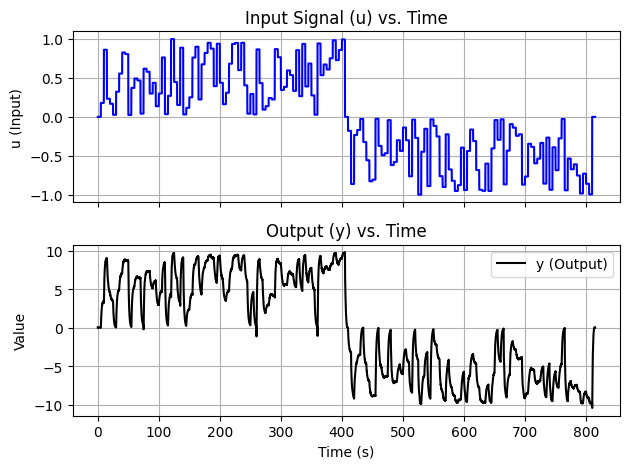

In [ ]:
# --- Configuration ---
# URL of the .mat file
file_url = 'https://github.com/helonayala/sysid/raw/refs/heads/main/data/randomStepSequence.mat'

time, u, y, _ = process_and_plot_mat_file(file_url)
